In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import Normalize
import os
import math

In [2]:
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams.update({'font.size': 20})

In [3]:
df_ics = pd.read_csv("coupledWReg/crosstalk_singles/emtmrH_lamdaHS_7_100_ics.txt")
df_res = pd.read_csv("coupledWReg/crosstalk_singles/emtmrH_lamdaHS_7_100_res.txt")

In [4]:
def plotHeatmap(x,y,nbin,xlabel='',ylabel='',title='',hold=False,save=False):

    [HH,xh,yh] = np.histogram2d(x,y,bins=(nbin,nbin))
    HH = HH.T/(1.)
    xmin,xmax=xh[0],xh[-1]
    ymin,ymax=yh[0],yh[-1]
    fig = plt.figure()
    plt.imshow(HH,interpolation='nearest',origin='low',extent=[xmin,xmax,ymin,ymax],aspect='auto',cmap='gnuplot2_r')#,cmap='jet',vmin=0.,vmax=100,aspect='auto')
    plt.colorbar()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)    
    plt.title(title)  
    print save,'B'
    if save:
        print 'A'
        fig.savefig(save+".png",bbox_inches='tight')
    if not hold:
        plt.show()
    plt.close()
    return [HH,xh,yh]

False B


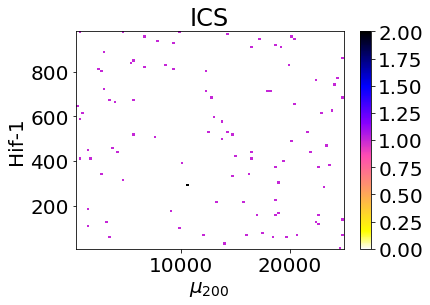

False B


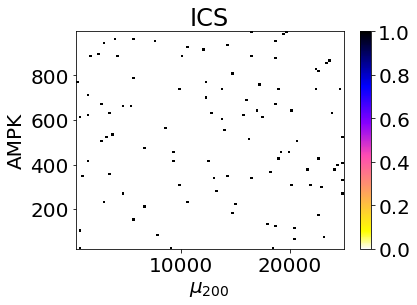

False B


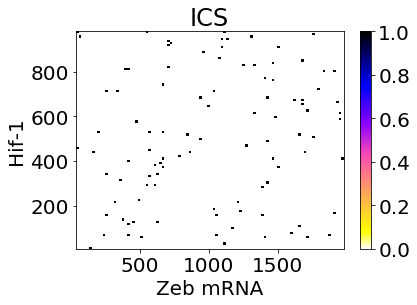

False B


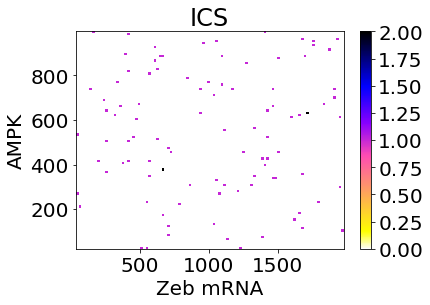

[array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([  37.  ,   56.41,   75.82,   95.23,  114.64,  134.05,  153.46,
         172.87,  192.28,  211.69,  231.1 ,  250.51,  269.92,  289.33,
         308.74,  328.15,  347.56,  366.97,  386.38,  405.79,  425.2 ,
         444.61,  464.02,  483.43,  502.84,  522.25,  541.66,  561.07,
         580.48,  599.89,  619.3 ,  638.71,  658.12,  677.53,  696.94,
         716.35,  735.76,  755.17,  774.58,  793.99,  813.4 ,  832.81,
         852.22,  871.63,  891.04,  910.45,  929.86,  949.27,  968.68,
         988.09, 1007.5 , 1026.91, 1046.32, 1065.73, 1085.14, 1104.55,
        1123.96, 1143.37, 1162.78, 1182.19, 1201.6 , 1221.01, 1240.42,
        1259.83, 1279.24, 1298.65, 1318.06, 1337.47, 1356.88, 1376.29,
        1395.7 , 1415.11, 1434.52, 1453.9

In [5]:
plotHeatmap(df_ics['u'],df_ics['h'],100,'$\mu_{200}$','Hif-1','ICS')
plotHeatmap(df_ics['u'],df_ics['A'],100,'$\mu_{200}$','AMPK','ICS')
plotHeatmap(df_ics['mz'],df_ics['h'],100,'Zeb mRNA','Hif-1','ICS')
plotHeatmap(df_ics['mz'],df_ics['A'],100,'Zeb mRNA','AMPK','ICS')



False B


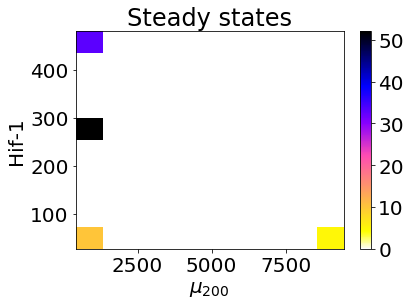

False B


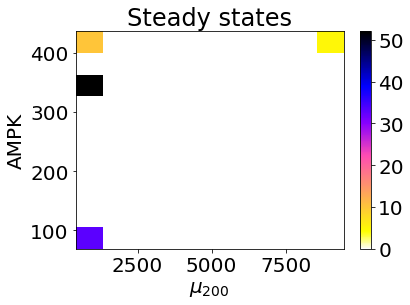

False B


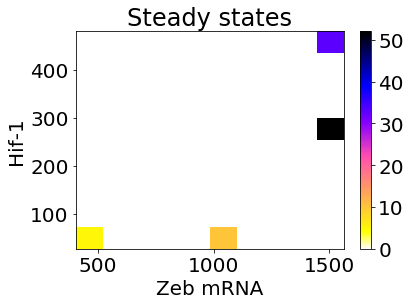

False B


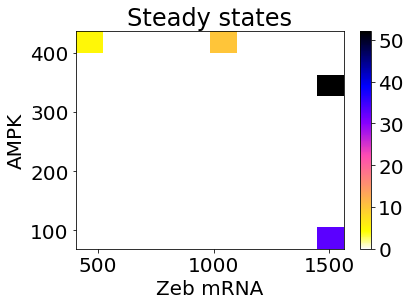

In [6]:
plotHeatmap(df_res['u'],df_res['h'],10,'$\mu_{200}$','Hif-1','Steady states')
plotHeatmap(df_res['u'],df_res['A'],10,'$\mu_{200}$','AMPK','Steady states')
plotHeatmap(df_res['mz'],df_res['h'],10,'Zeb mRNA','Hif-1','Steady states')
res_heatmap = plotHeatmap(df_res['mz'],df_res['A'],10,'Zeb mRNA','AMPK','Steady states')



In [7]:
def stateThresholds():
    ''''''
    return {'Zeb mRNA':[ 62+(301-62)/2.,301+(990-301)/2.]
            ,'$\mu_{200}$':[1265+(12389-1265)/2.,12389+(19098-12389)/2.],
            'Hif-1':[26+(292-26)/2.,292+(490-292)/2.],
            'AMPK':[69+(327-69)/2.,327+(436-327)/2.]}

In [8]:
def getStates_fromMap(df_res,hold=False,title=''):

    x2 = df_res['A']
    y2 = df_res['mz']
    x1 = df_res['u']
    y1 = df_res['h']
    hm1= plotHeatmap(x1,y1,10,'$\mu_{200}$','Hif-1','Steady States',hold,save=title)
    hm2 =plotHeatmap(x2,y2,10,'AMPK','Zeb mRNA','Steady States',hold)
    res2,res1={'n':[],'A':[],'mz':[]},{'n':[],'u':[],'h':[]}
    nr,nc = hm1[0].shape
    for i in range(nr):
        for j in range(nc):
            if hm1[0][i][j]>0:
                res1['n']+=[hm1[0][i][j]]
                res1['u']+=[hm1[1][j]]
                res1['h']+=[hm1[2][i]]

    nr,nc = hm2[0].shape      
    for i in range(nr):
        for j in range(nc):
            if hm2[0][i][j]>0:
                res2['n']+=[hm2[0][i][j]]
                res2['A']+=[hm2[1][j]]
                res2['mz']+=[hm2[2][i]]

    thresh = stateThresholds()

    results={'name':[],'loc':[],'amount':[]}
    resultsE={'name':[],'loc':[],'amount':[]}
    resultsM={'name':[],'loc':[],'amount':[]}
    met={}
    emt={}
    for row in range(len(res2['n'])):
        if res2['A'][row]<=thresh['AMPK'][0] :
            #low AMPK warburg
            ms='W'
        elif (res2['A'][row]>thresh['AMPK'][0]) and (res2['A'][row]<=thresh['AMPK'][1]) :
            # hybrid - intermediate ampk
            ms = 'WO'
        elif res2['A'][row]>thresh['AMPK'][1] :
            # high ampk oxphos
            ms='O'
        else:
            ms = 'NA'
        if res2['mz'][row]<=thresh['Zeb mRNA'][0] :
            #low Zeb - epithelial
            es='E'
        elif (res2['mz'][row]>thresh['Zeb mRNA'][0]) and (res2['mz'][row]<=thresh['Zeb mRNA'][1]) :
            # hybrid - intermediate zeb mrna
            es = 'EM'
        elif res2['mz'][row]>thresh['Zeb mRNA'][1] :
            # high zeb mesenchymal
            es='M'
        else:
            es = 'NA'    

        if res2['n'][row] not in met.keys():
            met[res2['n'][row]]=[ms]
            emt[res2['n'][row]]=[es]
        else:
            met[res2['n'][row]]+=[ms]
            emt[res2['n'][row]]+=[es]

    for row in range(len(res1['n'])):
        if res1['h'][row]<=thresh['Hif-1'][0] :
            #low hif1 oxphos
            ms='O'
        elif (res1['h'][row]>thresh['Hif-1'][0]) and (res1['h'][row]<=thresh['Hif-1'][1]) :
            # hybrid - intermediate 
            ms = 'WO'
        elif res1['h'][row]>thresh['Hif-1'][1] :
            # high hif1 warburg
            ms='W'
        else:
            ms = 'NA'
        if res1['u'][row]<=thresh['$\mu_{200}$'][0] :
            #low u200 - mesenchymal
            es='M'
        elif (res1['u'][row]>thresh['$\mu_{200}$'][0]) and (res1['u'][row]<=thresh['$\mu_{200}$'][1]) :
            # hybrid - intermediate 
            es = 'EM'
        elif res1['u'][row]>thresh['$\mu_{200}$'][1] :
            # high u200 epithelial
            es='E'
        else:
            es = 'NA'    


        if res1['n'][row] not in met.keys():
            met[res1['n'][row]]=[ms]
            emt[res1['n'][row]]=[es]
        else:
            for i in range(len(met[res1['n'][row]])):
                containedM=False
                if met[res1['n'][row]][i]==ms:
                    containedM=True
                if not containedM:
                    print "error in ",res1['n'][row]
                containedE=False
                if emt[res1['n'][row]][i]==es:
                    containedE=True
                if not containedE:
                    print "error in ",res1['n'][row]

                    
    count=0
    for i in met:
        for j in range(len(met[i])):
            tmp = emt[i][j]+"/"+met[i][j]
            results['name']+=[tmp]
            results['loc']+=[count]
            results['amount']+=[i]
            count+=1
        
    resultsE['name'] = ['E/O','E/WO','E/W','EM/O','EM/WO','EM/W','M/O','M/WO','M/W',]
    resultsM['name'] = ['E/O','EM/O','M/O','E/WO','EM/WO','M/WO','E/W','EM/W','M/W']
        
    tmpL = len(results['name'])
    for i in range(len(resultsE['name'])):
        added=False
        for j in range(len(results['name'])):
            if resultsE['name'][i]==results['name'][j]:
                resultsE['loc']+=[results['loc'][j]]
                resultsE['amount']+=[results['amount'][j]]
                added=True
        if not added:
            resultsE['loc']+= [tmpL]
            resultsE['amount']+=[0]
            tmpL+=1
    tmpL = len(results['name'])
    for i in range(len(resultsM['name'])):
        added=False
        for j in range(len(results['name'])):
            if resultsM['name'][i]==results['name'][j]:
                resultsM['loc']+=[results['loc'][j]]
                resultsM['amount']+=[results['amount'][j]]
                added=True
        if not added:
            resultsM['loc']+= [tmpL]
            resultsM['amount']+=[0]
            tmpL+=1
            #print resultsM['name'][i],resultsM['loc'][i],resultsM['amount'][i]
            
            

    return results,resultsE,resultsM,np.max(results['amount'])

In [9]:
def plotRes(filename,title=''):
    print title
    df_res = pd.read_csv(filename).dropna()  
    mapRes,mapResE,mapResM,maxC =getStates_fromMap(df_res,title=title)
    
    my_cmap = mpl.cm.get_cmap('rainbow')#gist_ncar')
    my_norm = Normalize(vmin=0, vmax=maxC)
    #ax.bar(range(8), rand(8), color=my_cmap(my_norm(data)))
    
    xvals = np.arange(0,len(mapRes['amount']))
    plt.bar(xvals,mapRes['amount'],color=my_cmap(my_norm(mapRes['amount'])))
    plt.xticks(xvals,mapRes['name'],rotation=80)
    plt.yscale("log")
    plt.xlabel("Steady state")
    plt.ylabel("Number of Initial Conditions")
    plt.show()
    plt.close()

    fig = plt.figure()
    xvals = np.arange(0,len(mapResE['amount']))
    plt.bar(xvals,mapResE['amount'],color=my_cmap(my_norm(mapResE['amount'])))
    plt.xticks(xvals,mapResE['name'],rotation=80)
    plt.yscale("log")
    plt.xlabel("Steady state")
    plt.ylabel("Number of Initial Conditions")
    title = filename.replace("res","emt")
    title = title.replace("txt","png")
    print title
    fig.savefig(title,bbox_inches='tight')
    plt.show()
    plt.close()

    fig = plt.figure()
    xvals = np.arange(0,len(mapResM['amount']))
    plt.bar(xvals,mapResM['amount'],color=my_cmap(my_norm(mapResM['amount'])))
    plt.xticks(xvals,mapResM['name'],rotation=80)
    plt.yscale("log")
    plt.xlabel("Steady state")
    plt.ylabel("Number of Initial Conditions")
    title = filename.replace("txt","png")
    title = title.replace("res","mr")
    print title
    fig.savefig(title,bbox_inches='tight')
    
    plt.show()


In [10]:
def getStates_fromMap2(df_res,show=True):

    x2 = df_res['A']
    y2 = df_res['mz']
    x1 = df_res['u']
    y1 = df_res['h']
    
    nbin=10
    [HH,xh,yh] = np.histogram2d(x1,y1,bins=(nbin,nbin))
    HH = HH.T/(1.)
    hm1=[HH,xh,yh]
    [HH,xh,yh] = np.histogram2d(x2,y2,bins=(nbin,nbin))
    HH = HH.T/(1.)
    hm2=[HH,xh,yh]
    
    res2,res1={'n':[],'A':[],'mz':[]},{'n':[],'u':[],'h':[]}
    nr,nc = hm1[0].shape
    for i in range(nr):
        for j in range(nc):
            if hm1[0][i][j]>0:
                res1['n']+=[hm1[0][i][j]]
                res1['u']+=[hm1[1][j]]
                res1['h']+=[hm1[2][i]]

    nr,nc = hm2[0].shape      
    for i in range(nr):
        for j in range(nc):
            if hm2[0][i][j]>0:
                res2['n']+=[hm2[0][i][j]]
                res2['A']+=[hm2[1][j]]
                res2['mz']+=[hm2[2][i]]

    thresh = stateThresholds()

    set1={'E':0,'EM':0,'M':0,'O':0,'WO':0,'W':0}
    for row in range(len(res1['n'])):
        if res1['h'][row]<=thresh['Hif-1'][0] :
            #low hif1 oxphos
            set1['O']+=res1['n'][row]
        elif (res1['h'][row]>thresh['Hif-1'][0]) and (res1['h'][row]<=thresh['Hif-1'][1]) :
            # hybrid - intermediate 
            set1['WO']+=res1['n'][row]
        elif res1['h'][row]>thresh['Hif-1'][1] :
            # high hif1 warburg
            set1['W']+=res1['n'][row]
        if res1['u'][row]<=thresh['$\mu_{200}$'][0] :
            #low u200 - mesenchymal
            set1['M']+=res1['n'][row]
        elif (res1['u'][row]>thresh['$\mu_{200}$'][0]) and (res1['u'][row]<=thresh['$\mu_{200}$'][1]) :
            # hybrid - intermediate 
            set1['EM']+=res1['n'][row]
        elif res1['u'][row]>thresh['$\mu_{200}$'][1] :
            # high u200 epithelial
            set1['E']+=res1['n'][row]

    set2={'E':0,'EM':0,'M':0,'O':0,'WO':0,'W':0}
    for row in range(len(res2['n'])):
        if res2['A'][row]<=thresh['AMPK'][0] :
            #low AMPK warburg
            set2['W']+=res2['n'][row]
        elif (res2['A'][row]>thresh['AMPK'][0]) and (res2['A'][row]<=thresh['AMPK'][1]) :
            # hybrid - intermediate ampk
            set2['WO']+=res2['n'][row]
        elif res2['A'][row]>thresh['AMPK'][1] :
            # high ampk oxphos
            set2['O']+=res2['n'][row]
        if res2['mz'][row]<=thresh['Zeb mRNA'][0] :
            #low Zeb - epithelial
            set2['E']+=res2['n'][row]
        elif (res2['mz'][row]>thresh['Zeb mRNA'][0]) and (res2['mz'][row]<=thresh['Zeb mRNA'][1]) :
            # hybrid - intermediate zeb mrna
            set2['EM']+=res2['n'][row]
        elif res2['mz'][row]>thresh['Zeb mRNA'][1] :
            # high zeb mesenchymal
            set2['M']+=res2['n'][row]

    for key in set1:
        if set1[key] != set2[key]:
            print "error, mismatch in ", key
    return set1

In [11]:
def plotCombo(filename):
    df_res = pd.read_csv(filename).dropna()  
    results =getStates_fromMap2(df_res)
    my_cmap = mpl.cm.get_cmap('rainbow')#gist_ncar')
    #my_norm = Normalize(vmin=0, vmax=maxC)
    #ax.bar(range(8), rand(8), color=my_cmap(my_norm(data)))
                
    for key in results:
        print key,results[key]
            
    ename = ['E','M','EM']
    eamount=[results['E'],results['M'],results['EM']]
            
    xvals = np.arange(0,3)
    plt.bar(xvals,eamount)
    plt.xticks(xvals,ename,rotation=80)
    plt.yscale("log")
    plt.xlabel("EMT phenotype")
    plt.ylabel("# ICS")
    plt.show()

    mname = ['O','WO','W']
    mamount=[results['O'],results['WO'],results['W']]
    plt.bar(xvals,mamount)
    plt.xticks(xvals,mname,rotation=80)
    plt.yscale("log")
    plt.ylabel("# ICS")
    plt.xlabel("Metabolism phenotype")
    plt.show()

EM 5.0
E 0
WO 52.0
M 95.0
O 15.0
W 33.0


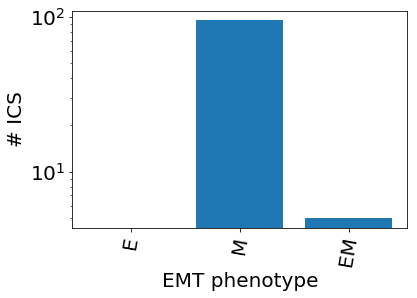

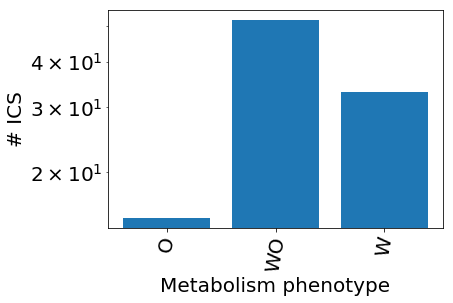

In [12]:
plotCombo("coupledWReg/crosstalk_singles/emtmrH_lamdaHS_7_100_res.txt")

coupledWReg_Ccode/crosstalk_comparison/comp_0_1000
coupledWReg_Ccode/crosstalk_comparison/comp_0_1000 B
A


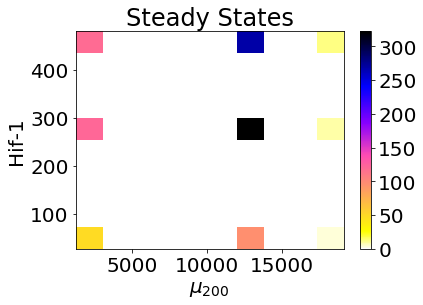

False B


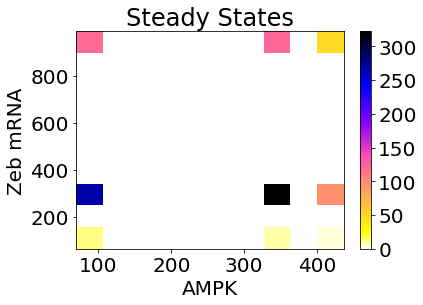

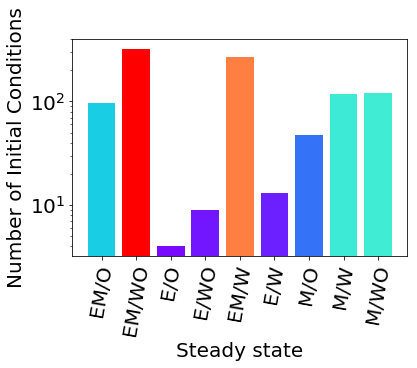

coupledWReg_Ccode/crosstalk_comparison/EMT_MR_comp_0_1000_emt.png


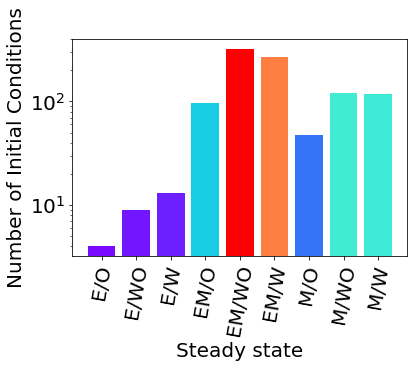

coupledWReg_Ccode/crosstalk_comparison/EMT_MR_comp_0_1000_mr.png


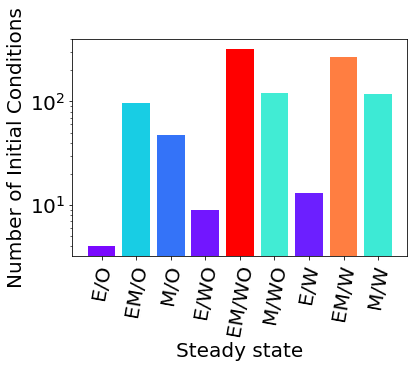

In [13]:
plotRes("coupledWReg_Ccode/crosstalk_comparison/EMT_MR_comp_0_1000_res.txt",'coupledWReg_Ccode/crosstalk_comparison/comp_0_1000')

EMT_MR_lamdaIHu1_1000_res.txt
coupledWReg_Ccode/crosstalk_singles/EMT_MR_lamdaIHu1_1000
coupledWReg_Ccode/crosstalk_singles/EMT_MR_lamdaIHu1_1000 B
A


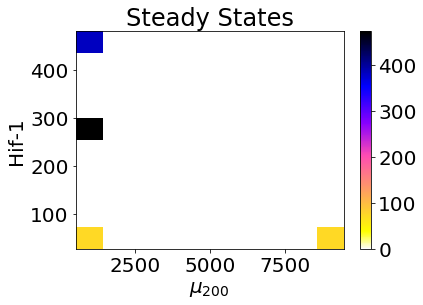

False B


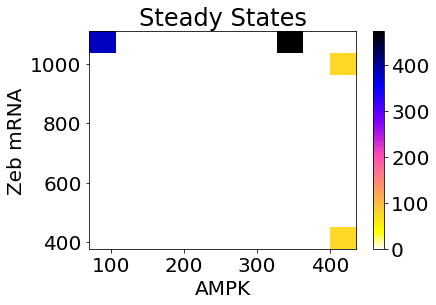

error in  73.0
error in  73.0


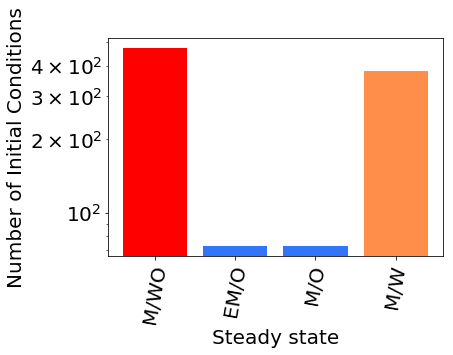

coupledWReg_Ccode/crosstalk_singles/EMT_MR_lamdaIHu1_1000_emt.png


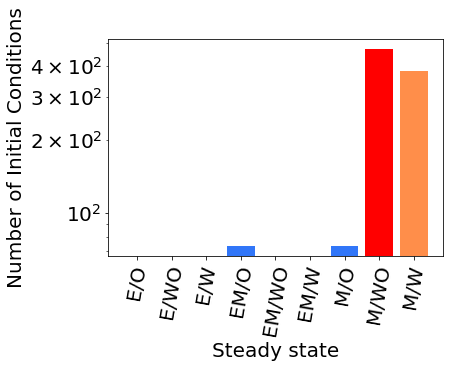

coupledWReg_Ccode/crosstalk_singles/EMT_MR_lamdaIHu1_1000_mr.png


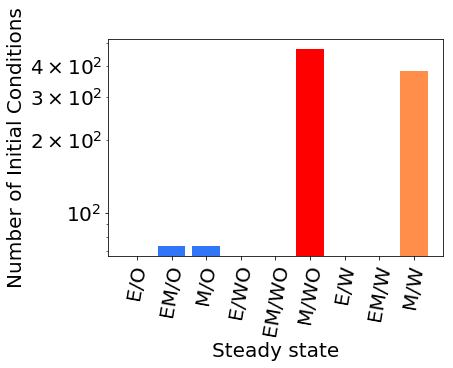

EMT_MR_lamdau3Rn3_1000_res.txt
coupledWReg_Ccode/crosstalk_singles/EMT_MR_lamdau3Rn3_1000
coupledWReg_Ccode/crosstalk_singles/EMT_MR_lamdau3Rn3_1000 B
A


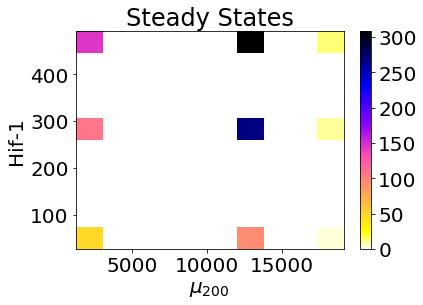

False B


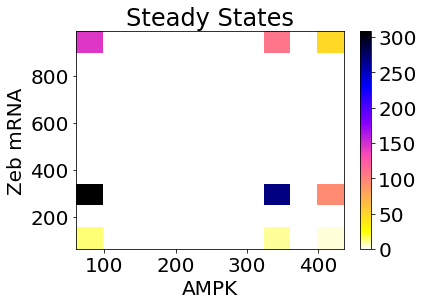

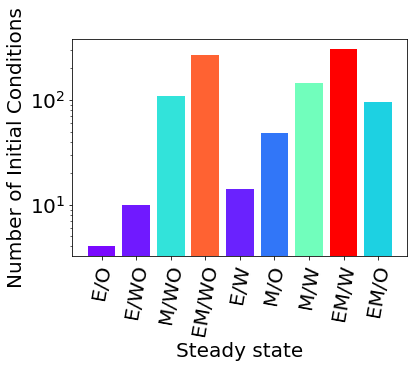

coupledWReg_Ccode/crosstalk_singles/EMT_MR_lamdau3Rn3_1000_emt.png


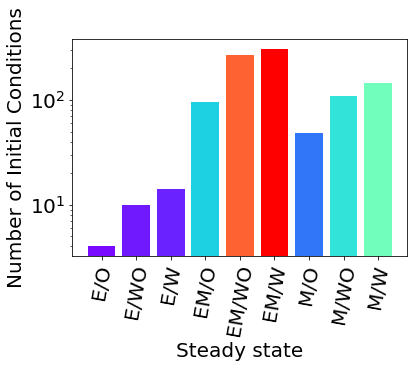

coupledWReg_Ccode/crosstalk_singles/EMT_MR_lamdau3Rn3_1000_mr.png


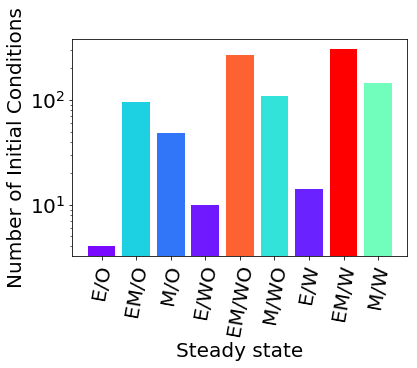

EMT_MR_lamdaIHu5_1000_res.txt
coupledWReg_Ccode/crosstalk_singles/EMT_MR_lamdaIHu5_1000
coupledWReg_Ccode/crosstalk_singles/EMT_MR_lamdaIHu5_1000 B
A


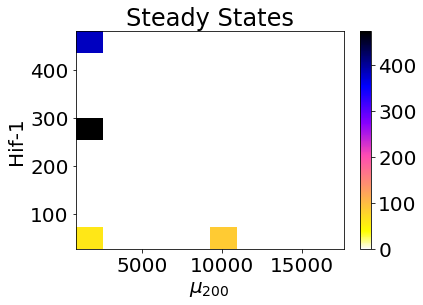

False B


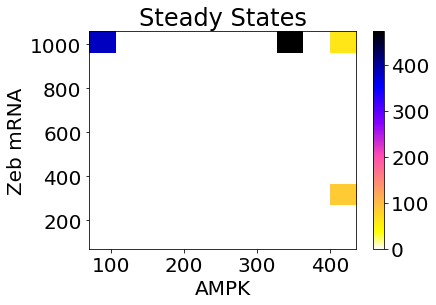

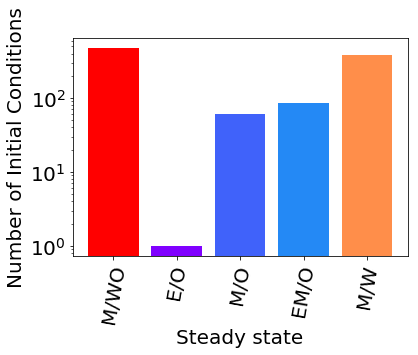

coupledWReg_Ccode/crosstalk_singles/EMT_MR_lamdaIHu5_1000_emt.png


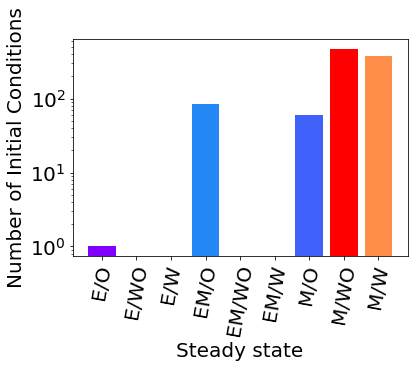

coupledWReg_Ccode/crosstalk_singles/EMT_MR_lamdaIHu5_1000_mr.png


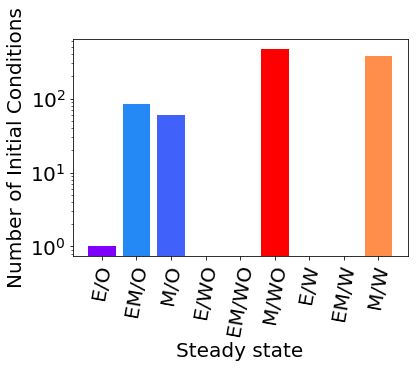

EMT_MR_lamdaAS7_1000_res.txt
coupledWReg_Ccode/crosstalk_singles/EMT_MR_lamdaAS7_1000
coupledWReg_Ccode/crosstalk_singles/EMT_MR_lamdaAS7_1000 B
A


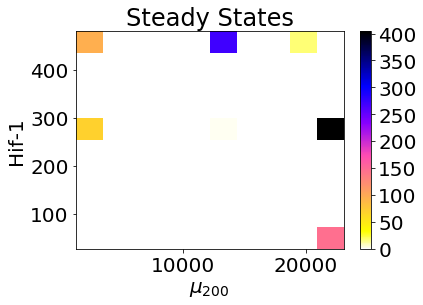

False B


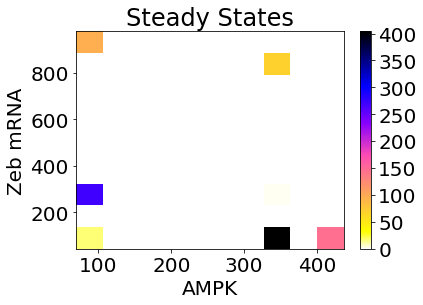

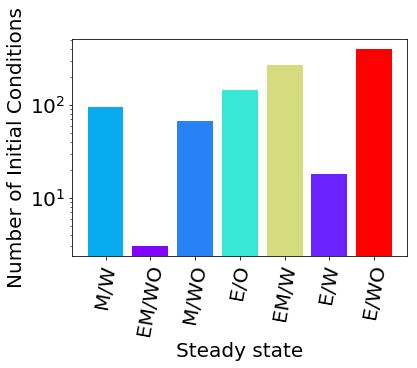

coupledWReg_Ccode/crosstalk_singles/EMT_MR_lamdaAS7_1000_emt.png


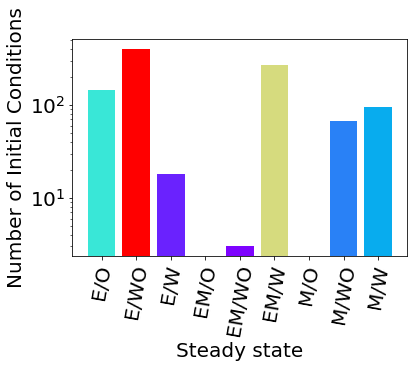

coupledWReg_Ccode/crosstalk_singles/EMT_MR_lamdaAS7_1000_mr.png


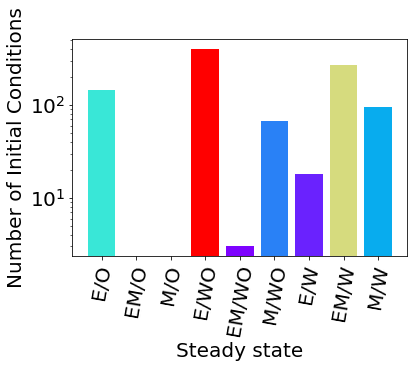

EMT_MR_lamdau3Rn5_1000_res.txt
coupledWReg_Ccode/crosstalk_singles/EMT_MR_lamdau3Rn5_1000
coupledWReg_Ccode/crosstalk_singles/EMT_MR_lamdau3Rn5_1000 B
A


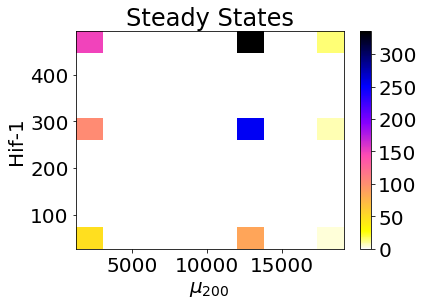

False B


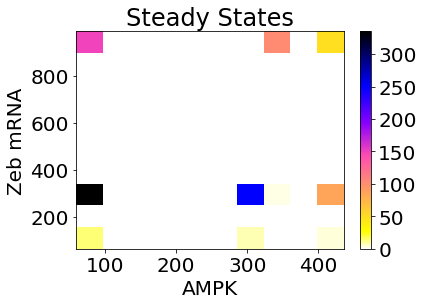

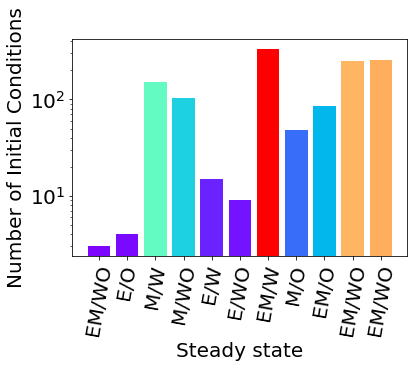

coupledWReg_Ccode/crosstalk_singles/EMT_MR_lamdau3Rn5_1000_emt.png


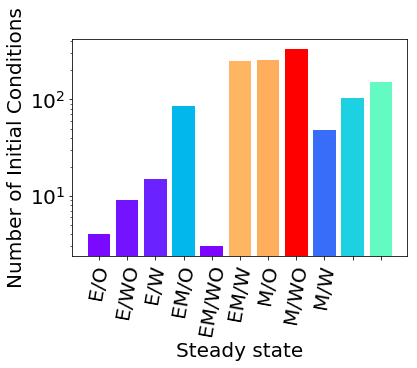

coupledWReg_Ccode/crosstalk_singles/EMT_MR_lamdau3Rn5_1000_mr.png


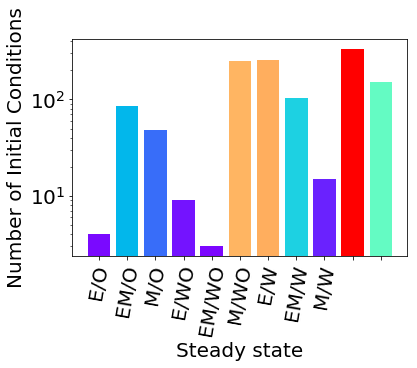

EMT_MR_lamdaAu2_1000_res.txt
coupledWReg_Ccode/crosstalk_singles/EMT_MR_lamdaAu2_1000
coupledWReg_Ccode/crosstalk_singles/EMT_MR_lamdaAu2_1000 B
A


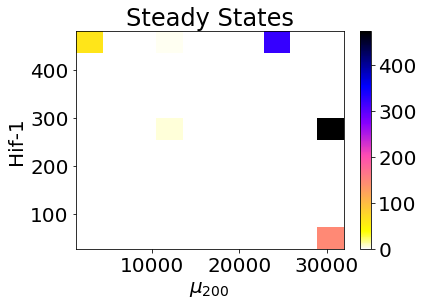

False B


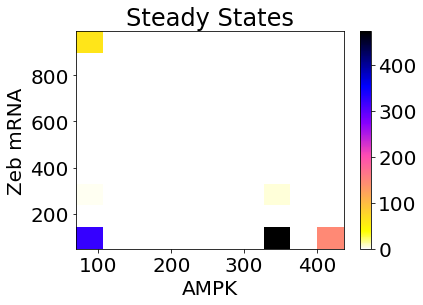

error in  1.0
error in  1.0
error in  1.0
error in  1.0


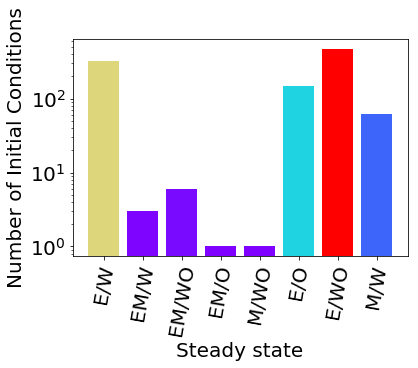

coupledWReg_Ccode/crosstalk_singles/EMT_MR_lamdaAu2_1000_emt.png


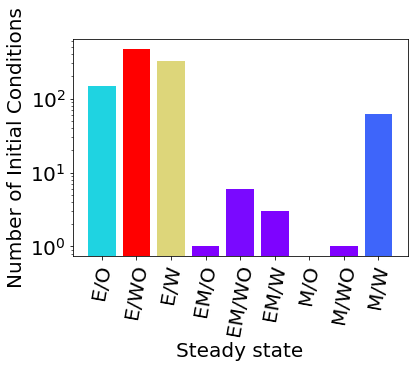

coupledWReg_Ccode/crosstalk_singles/EMT_MR_lamdaAu2_1000_mr.png


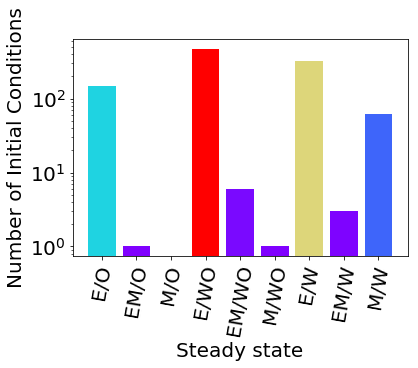

EMT_MR_lamdau3Rm4_1000_res.txt
coupledWReg_Ccode/crosstalk_singles/EMT_MR_lamdau3Rm4_1000
coupledWReg_Ccode/crosstalk_singles/EMT_MR_lamdau3Rm4_1000 B
A


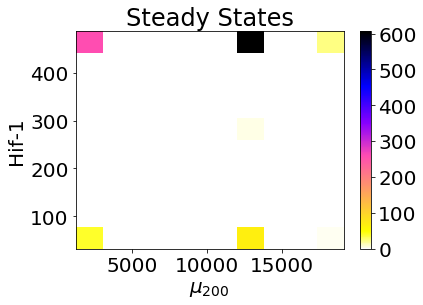

False B


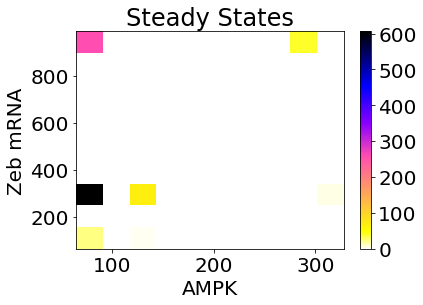

error in  42.0
error in  68.0
error in  3.0


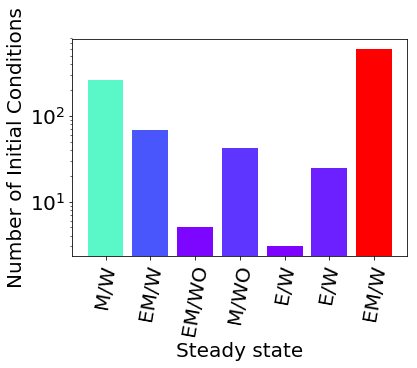

coupledWReg_Ccode/crosstalk_singles/EMT_MR_lamdau3Rm4_1000_emt.png


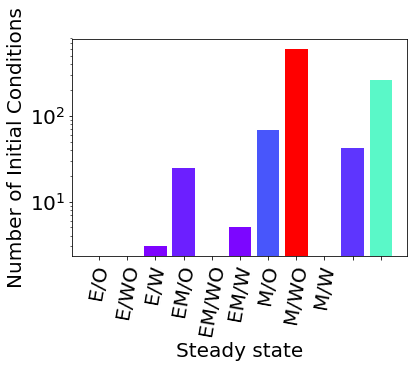

coupledWReg_Ccode/crosstalk_singles/EMT_MR_lamdau3Rm4_1000_mr.png


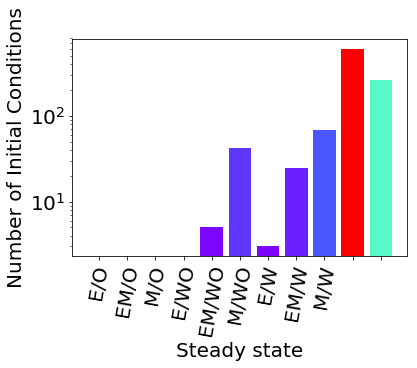

EMT_MR_lamdaHS9_1000_res.txt
coupledWReg_Ccode/crosstalk_singles/EMT_MR_lamdaHS9_1000
coupledWReg_Ccode/crosstalk_singles/EMT_MR_lamdaHS9_1000 B
A


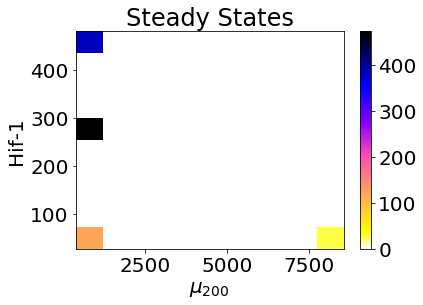

False B


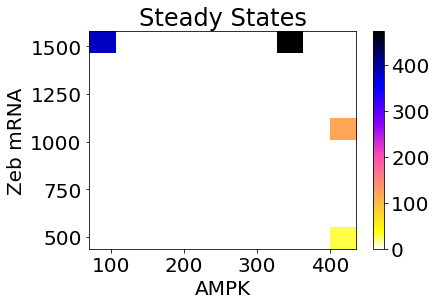

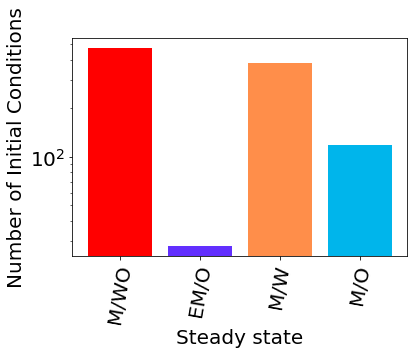

coupledWReg_Ccode/crosstalk_singles/EMT_MR_lamdaHS9_1000_emt.png


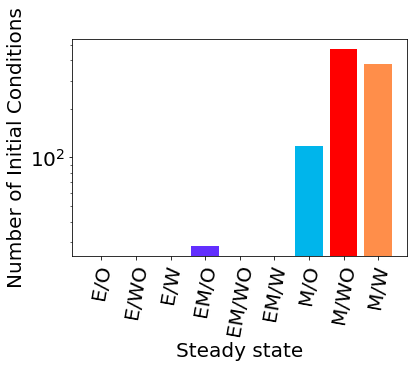

coupledWReg_Ccode/crosstalk_singles/EMT_MR_lamdaHS9_1000_mr.png


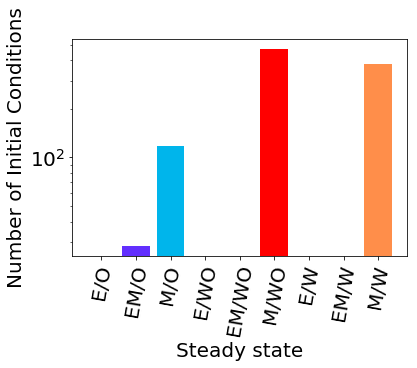

EMT_MR_lamdau3Rm7_1000_res.txt
coupledWReg_Ccode/crosstalk_singles/EMT_MR_lamdau3Rm7_1000
coupledWReg_Ccode/crosstalk_singles/EMT_MR_lamdau3Rm7_1000 B
A


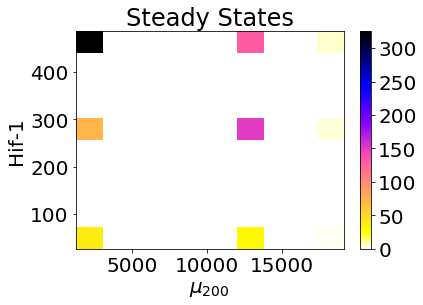

False B


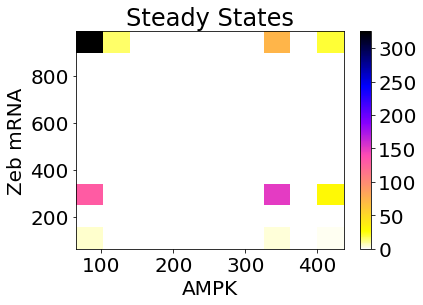

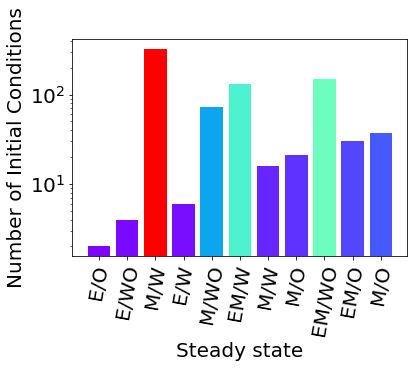

coupledWReg_Ccode/crosstalk_singles/EMT_MR_lamdau3Rm7_1000_emt.png


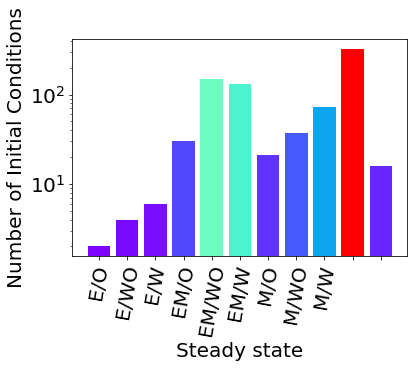

coupledWReg_Ccode/crosstalk_singles/EMT_MR_lamdau3Rm7_1000_mr.png


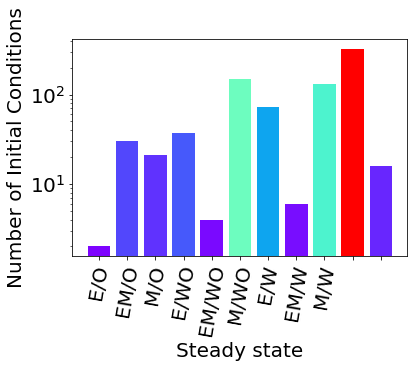

EMT_MR_lamdaHu4_1000_res.txt
coupledWReg_Ccode/crosstalk_singles/EMT_MR_lamdaHu4_1000
coupledWReg_Ccode/crosstalk_singles/EMT_MR_lamdaHu4_1000 B
A


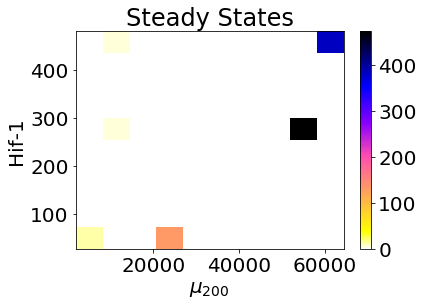

False B


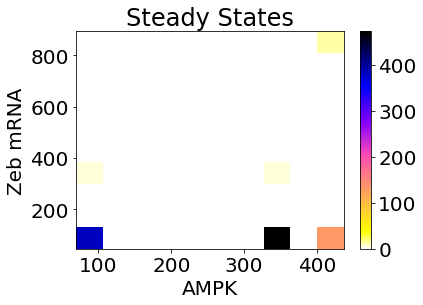

error in  6.0
error in  6.0


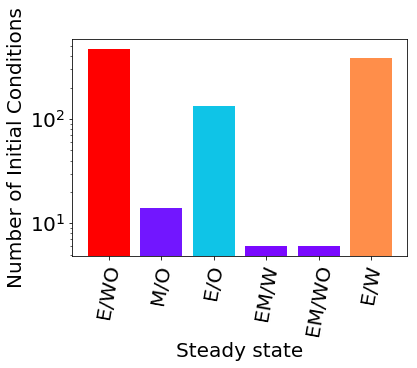

coupledWReg_Ccode/crosstalk_singles/EMT_MR_lamdaHu4_1000_emt.png


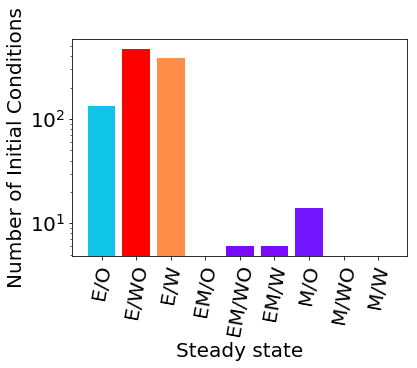

coupledWReg_Ccode/crosstalk_singles/EMT_MR_lamdaHu4_1000_mr.png


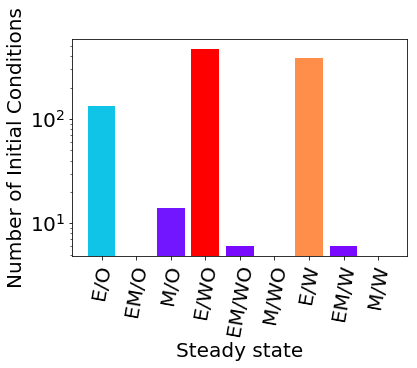

EMT_MR_lamdaAS1_1000_res.txt
coupledWReg_Ccode/crosstalk_singles/EMT_MR_lamdaAS1_1000
coupledWReg_Ccode/crosstalk_singles/EMT_MR_lamdaAS1_1000 B
A


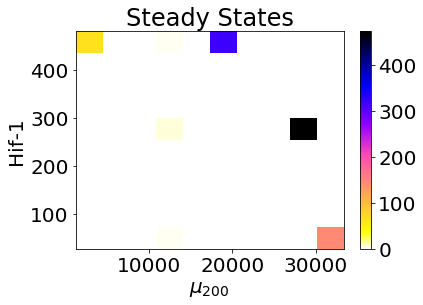

False B


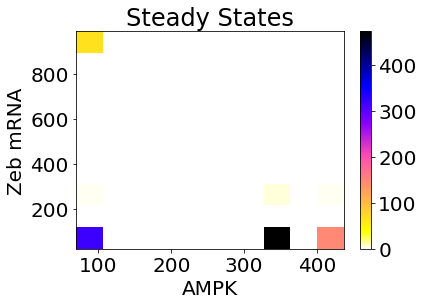

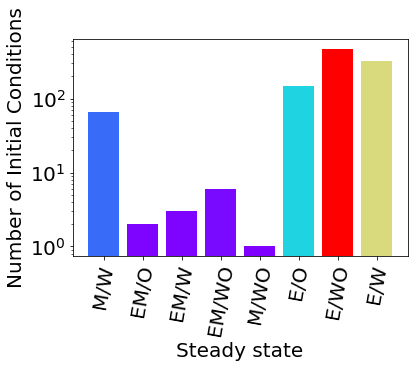

coupledWReg_Ccode/crosstalk_singles/EMT_MR_lamdaAS1_1000_emt.png


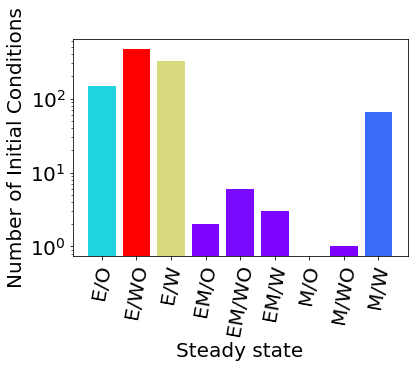

coupledWReg_Ccode/crosstalk_singles/EMT_MR_lamdaAS1_1000_mr.png


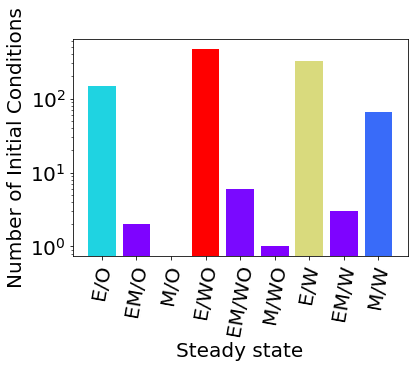

EMT_MR_lamdau3Rn4_1000_res.txt
coupledWReg_Ccode/crosstalk_singles/EMT_MR_lamdau3Rn4_1000
coupledWReg_Ccode/crosstalk_singles/EMT_MR_lamdau3Rn4_1000 B
A


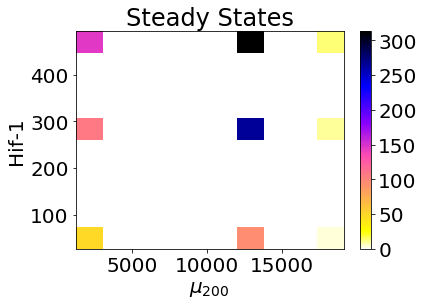

False B


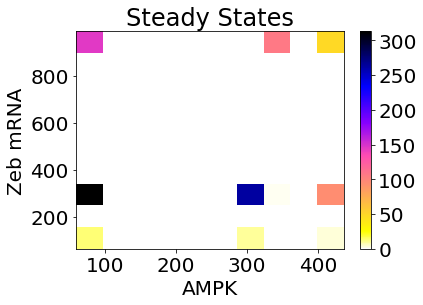

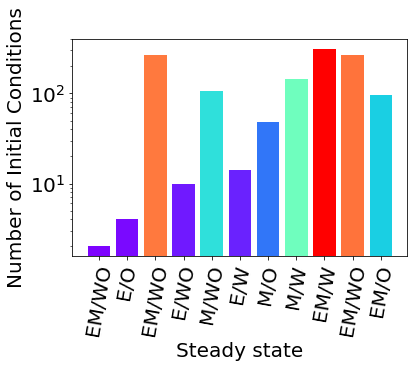

coupledWReg_Ccode/crosstalk_singles/EMT_MR_lamdau3Rn4_1000_emt.png


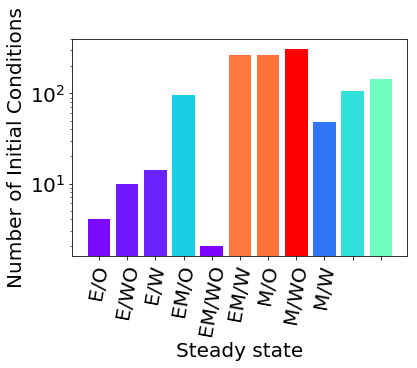

coupledWReg_Ccode/crosstalk_singles/EMT_MR_lamdau3Rn4_1000_mr.png


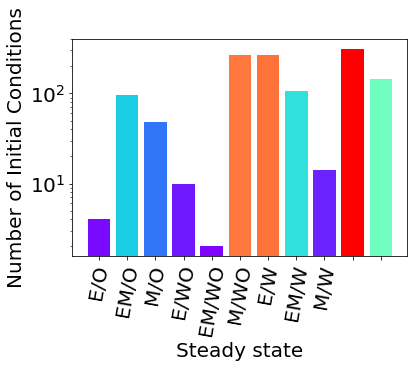

EMT_MR_lamdaAu4_1000_res.txt
coupledWReg_Ccode/crosstalk_singles/EMT_MR_lamdaAu4_1000
coupledWReg_Ccode/crosstalk_singles/EMT_MR_lamdaAu4_1000 B
A


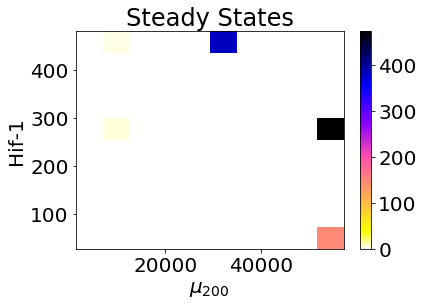

False B


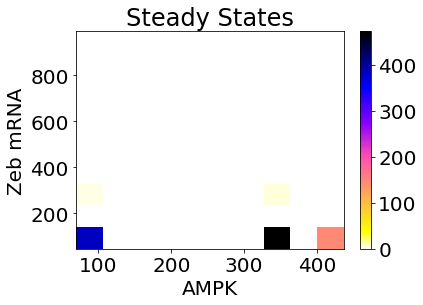

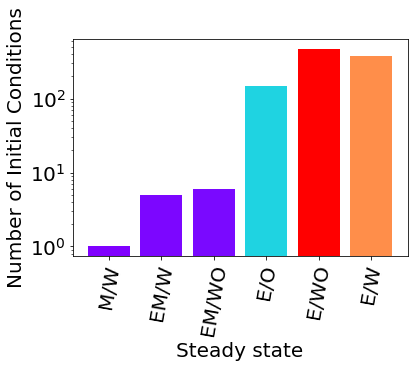

coupledWReg_Ccode/crosstalk_singles/EMT_MR_lamdaAu4_1000_emt.png


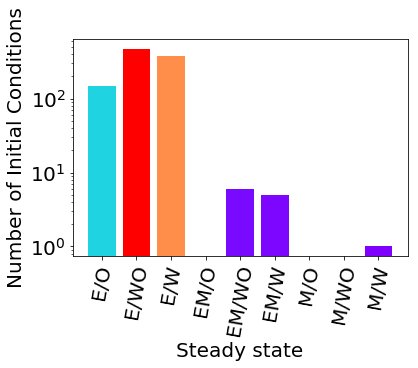

coupledWReg_Ccode/crosstalk_singles/EMT_MR_lamdaAu4_1000_mr.png


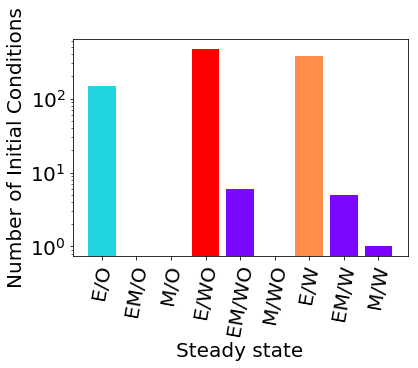

EMT_MR_lamdau3Rm5_1000_res.txt
coupledWReg_Ccode/crosstalk_singles/EMT_MR_lamdau3Rm5_1000
coupledWReg_Ccode/crosstalk_singles/EMT_MR_lamdau3Rm5_1000 B
A


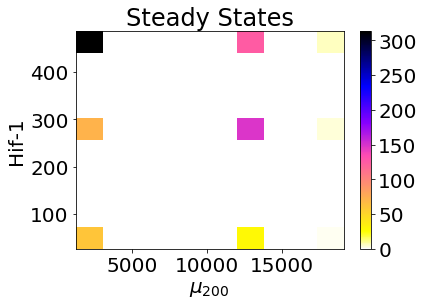

False B


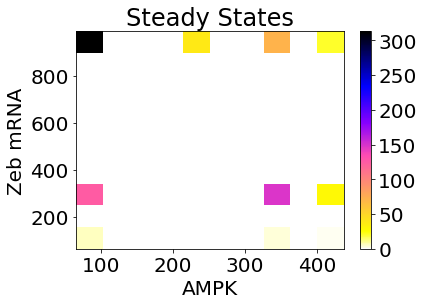

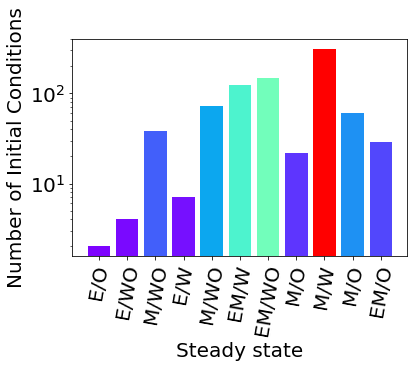

coupledWReg_Ccode/crosstalk_singles/EMT_MR_lamdau3Rm5_1000_emt.png


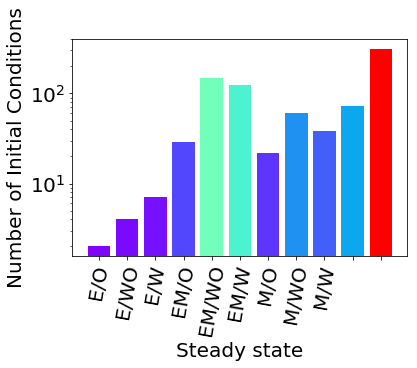

coupledWReg_Ccode/crosstalk_singles/EMT_MR_lamdau3Rm5_1000_mr.png


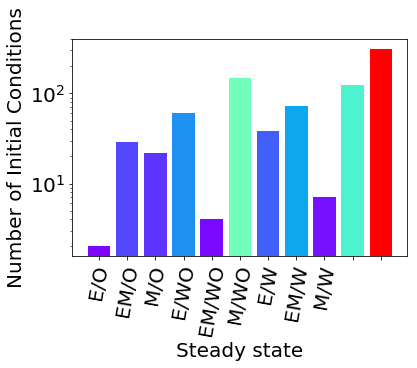

EMT_MR_lamdaHS8_1000_res.txt
coupledWReg_Ccode/crosstalk_singles/EMT_MR_lamdaHS8_1000
coupledWReg_Ccode/crosstalk_singles/EMT_MR_lamdaHS8_1000 B
A


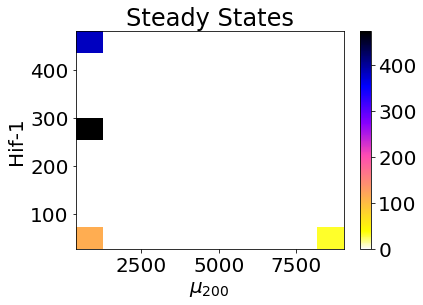

False B


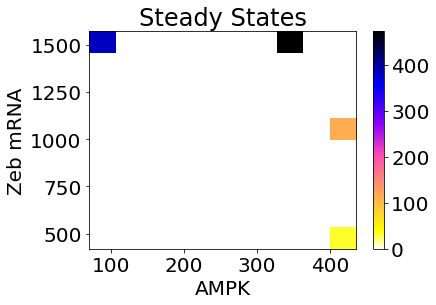

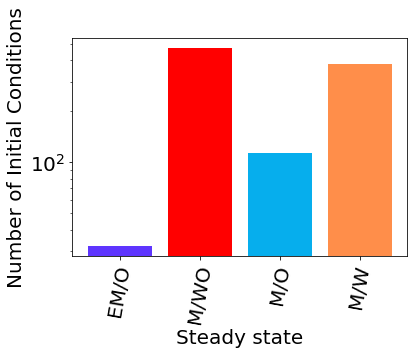

coupledWReg_Ccode/crosstalk_singles/EMT_MR_lamdaHS8_1000_emt.png


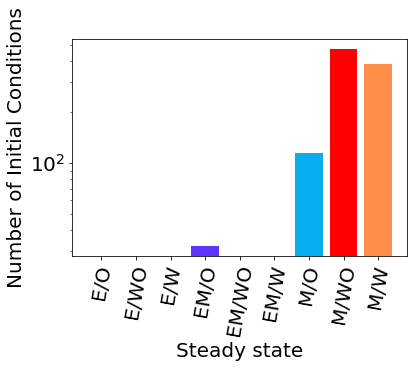

coupledWReg_Ccode/crosstalk_singles/EMT_MR_lamdaHS8_1000_mr.png


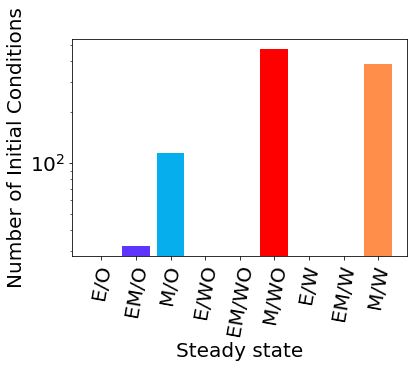

EMT_MR_lamdaHu1_1000_res.txt
coupledWReg_Ccode/crosstalk_singles/EMT_MR_lamdaHu1_1000
coupledWReg_Ccode/crosstalk_singles/EMT_MR_lamdaHu1_1000 B
A


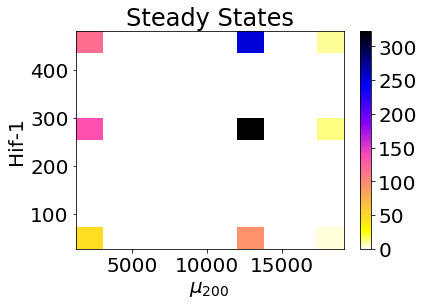

False B


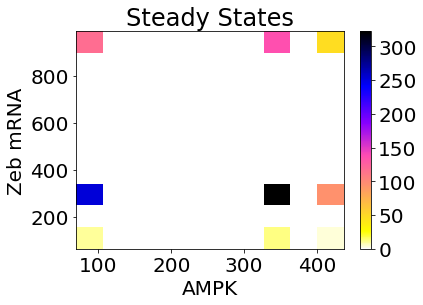

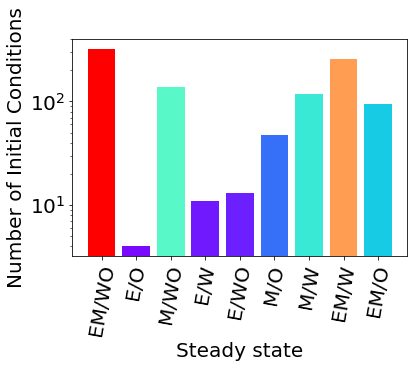

coupledWReg_Ccode/crosstalk_singles/EMT_MR_lamdaHu1_1000_emt.png


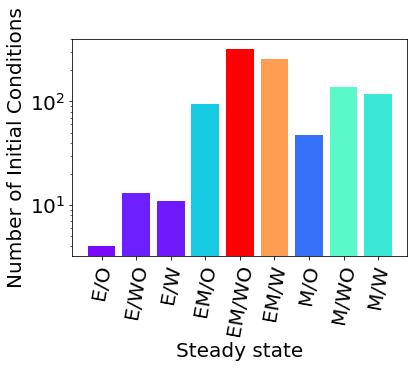

coupledWReg_Ccode/crosstalk_singles/EMT_MR_lamdaHu1_1000_mr.png


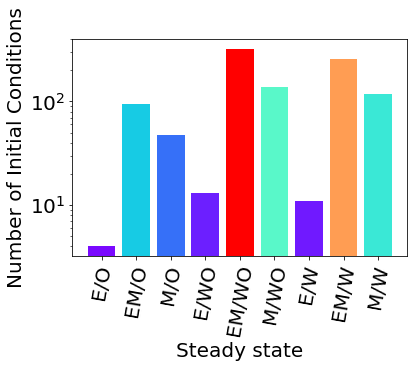

EMT_MR_lamdaIHu0_1000_res.txt
coupledWReg_Ccode/crosstalk_singles/EMT_MR_lamdaIHu0_1000
coupledWReg_Ccode/crosstalk_singles/EMT_MR_lamdaIHu0_1000 B
A


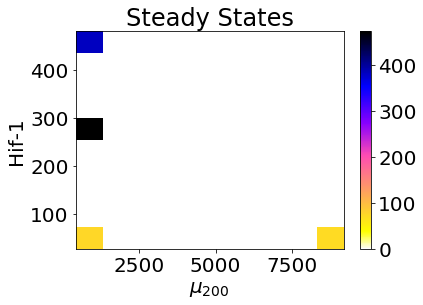

False B


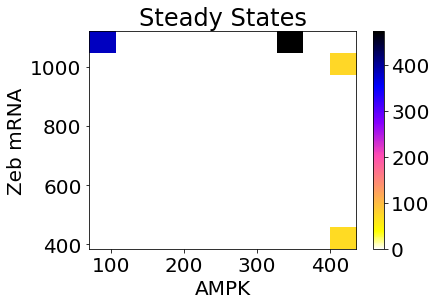

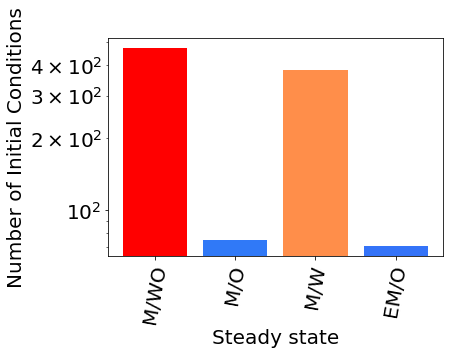

coupledWReg_Ccode/crosstalk_singles/EMT_MR_lamdaIHu0_1000_emt.png


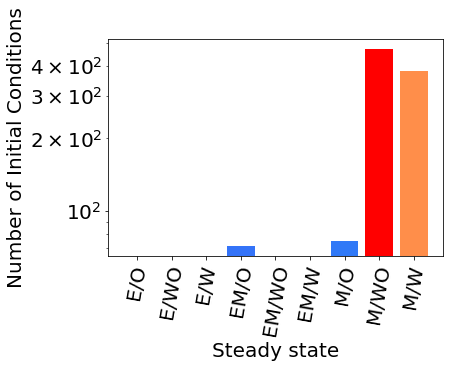

coupledWReg_Ccode/crosstalk_singles/EMT_MR_lamdaIHu0_1000_mr.png


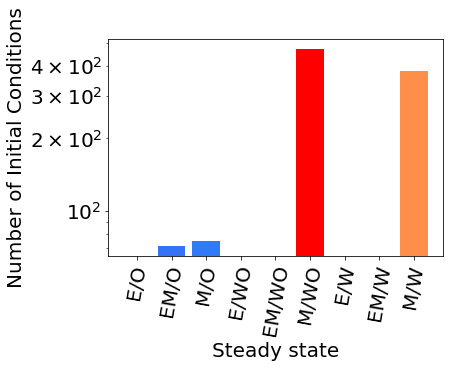

EMT_MR_lamdaIHu6_1000_res.txt
coupledWReg_Ccode/crosstalk_singles/EMT_MR_lamdaIHu6_1000
coupledWReg_Ccode/crosstalk_singles/EMT_MR_lamdaIHu6_1000 B
A


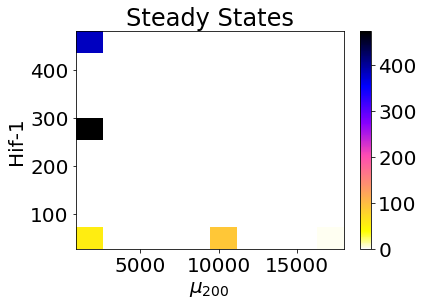

False B


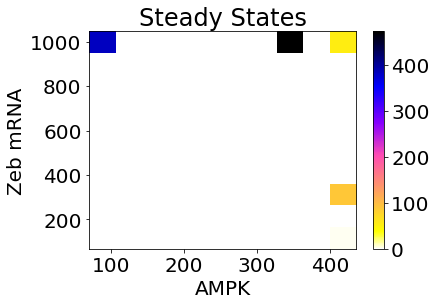

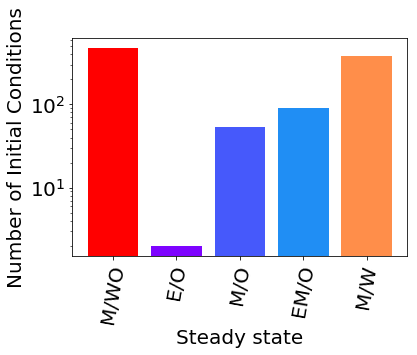

coupledWReg_Ccode/crosstalk_singles/EMT_MR_lamdaIHu6_1000_emt.png


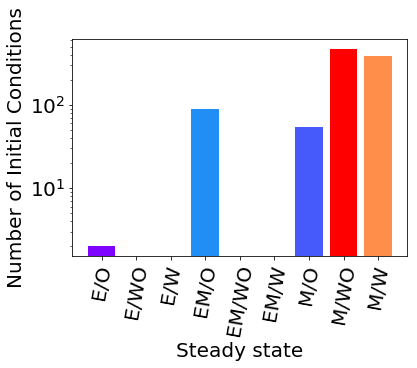

coupledWReg_Ccode/crosstalk_singles/EMT_MR_lamdaIHu6_1000_mr.png


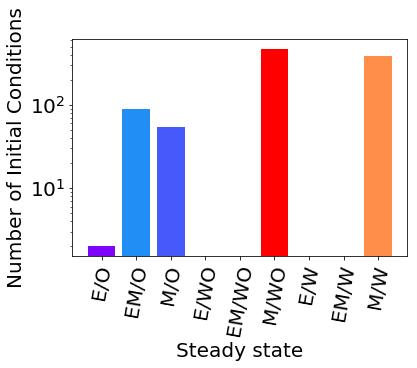

EMT_MR_lamdaHu3_1000_res.txt
coupledWReg_Ccode/crosstalk_singles/EMT_MR_lamdaHu3_1000
coupledWReg_Ccode/crosstalk_singles/EMT_MR_lamdaHu3_1000 B
A


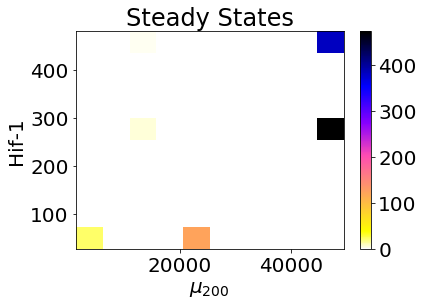

False B


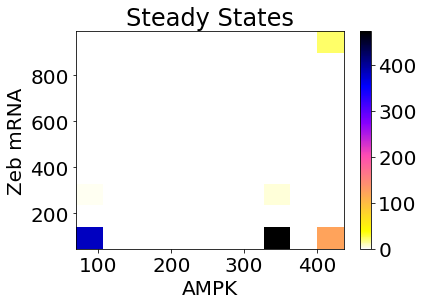

error in  1.0
error in  1.0
error in  1.0
error in  1.0
error in  1.0
error in  1.0
error in  1.0
error in  1.0
error in  1.0
error in  1.0


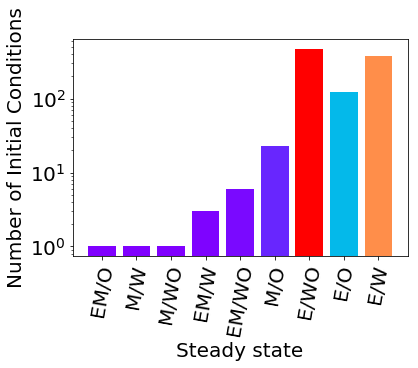

coupledWReg_Ccode/crosstalk_singles/EMT_MR_lamdaHu3_1000_emt.png


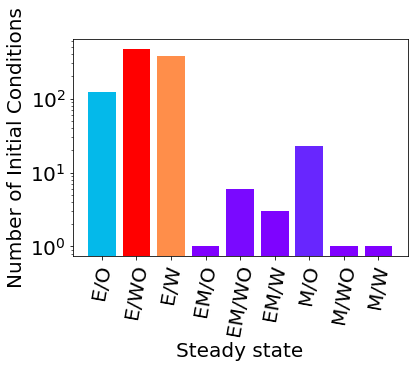

coupledWReg_Ccode/crosstalk_singles/EMT_MR_lamdaHu3_1000_mr.png


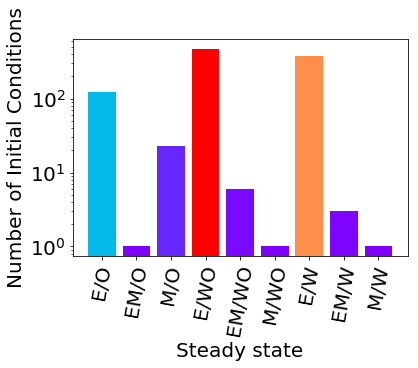

EMT_MR_lamdau3Rn7_1000_res.txt
coupledWReg_Ccode/crosstalk_singles/EMT_MR_lamdau3Rn7_1000


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [14]:
for filen in os.listdir("coupledWReg_Ccode/crosstalk_singles"):
    if "res" in filen and "txt" in filen:
        print filen
        filet = filen.replace('_res.txt','')
        plotRes("coupledWReg_Ccode/crosstalk_singles/"+filen,"coupledWReg_Ccode/crosstalk_singles/"+filet) 

In [ ]:
def CompRes(filename,fileOG):
    df_res = pd.read_csv(filename).dropna()    
    df_comp = pd.read_csv(fileOG).dropna()    
    mapRes,mapResE,mapResM,maxC =getStates_fromMap(df_res,hold=True)
    mapResC,mapResEC,mapResMC,maxCC =getStates_fromMap(df_comp,hold=True)
    
    my_cmap = mpl.cm.get_cmap('rainbow')#gist_ncar')
    my_norm = Normalize(vmin=0, vmax=maxC)

    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,7))
    fig.subplots_adjust(hspace=0.01,wspace=0.01)

    title = filename.replace("res","emt")
    xvals = np.arange(0,len(mapResE['amount']))
    if len(mapResEC['amount'])<len(mapResE['amount']):
        print "Error for ", filename
    print mapResE['amount']
    print mapResEC['amount']
    yvals = np.array(mapResE['amount'])-np.array(mapResEC['amount'])
    miny,maxy = np.min(yvals),np.max(yvals)
    ax1.bar(xvals,yvals,color=my_cmap(my_norm(mapResE['amount'])))
    ax1.set_xticks(xvals)
    ax1.set_xticklabels(mapResE['name'],rotation=80)
    #plt.yscale("log")
    ax1.set_xlabel("Steady state")
    ax1.set_ylabel("$\Delta$ Number of Initial Conditions")

    xvals = np.arange(0,len(mapResM['amount']))
    if len(mapResMC['amount'])<len(mapResM['amount']):
        print "Error for ", filename
    yvals = np.array(mapResM['amount'])-np.array(mapResMC['amount'])
    ax2.bar(xvals,yvals,color=my_cmap(my_norm(mapResM['amount'])))
    ax2.set_xticks(xvals)
    ax2.set_xticklabels(mapResM['name'],rotation=80)
    ax2.set_yticks([])
    ax1.set_ylim(miny-1,maxy+1)
    ax2.set_ylim(miny-1,maxy+1)
    ax2.set_xlabel("Steady state")
    
    title = filename.replace("txt","png")
    #title = title.replace("res","mr")
    fig.savefig(title,bbox_inches='tight')
    plt.show()


In [ ]:
def KL(filename,fileOG):
    df_res = pd.read_csv(filename)    
    df_comp = pd.read_csv(fileOG)   
    mapRes,mapResE,mapResM,maxC =getStates_fromMap(df_res,hold=True)
    mapResC,mapResEC,mapResMC,maxCC =getStates_fromMap(df_comp,hold=True)
    
    mapResM['amount'] = np.array(mapResM['amount'])
    mapResMC['amount'] = np.array(mapResMC['amount'])
    total=0
    for i in range(len(mapResM['amount'])):
        if mapResM['amount'][i]>0 and mapResMC['amount'][i]>0:
            total+= mapResM['amount'][i]*np.log10(mapResM['amount'][i]/mapResMC['amount'][i]) 
    return total

In [ ]:
CompRes("coupledWReg_Ccode/crosstalk_comparison/EMT_MR_comp_0_1000_res.txt","coupledWReg_Ccode/crosstalk_singles/EMT_MR_lamdaAu1_1000_res.txt")
CompRes("coupledWReg_Ccode/crosstalk_comparison/EMT_MR_comp_0_1000_res.txt","coupledWReg_Ccode/crosstalk_singles/EMT_MR_lamdaHS1_1000_res.txt")
CompRes("coupledWReg_Ccode/crosstalk_comparison/EMT_MR_comp_0_1000_res.txt","coupledWReg_Ccode/crosstalk_singles/EMT_MR_lamdaHu1_1000_res.txt")
CompRes("coupledWReg_Ccode/crosstalk_comparison/EMT_MR_comp_0_1000_res.txt","coupledWReg_Ccode/crosstalk_singles/EMT_MR_lamdau3Rm1_1000_res.txt")
CompRes("coupledWReg_Ccode/crosstalk_comparison/EMT_MR_comp_0_1000_res.txt","coupledWReg_Ccode/crosstalk_singles/EMT_MR_lamdau3Rn1_1000_res.txt")

In [ ]:
direct = "coupledWReg_Ccode/crosstalk_singles/"
comps,regs = ["coupledWReg_Ccode/crosstalk_comparison/EMT_MR_comp_0_1000_res.txt"],[]
for filen in os.listdir(direct):
    if "res.txt" in filen:
        regs+=[filen]


In [ ]:
for filen in regs:
    [tmp,tmp,name,tmp,tmp]=filen.split(".")[0].split("_")
    while name[-1].isdigit():
        name = name[:-1]
        try:
            print direct+filen, comps[0]
            CompRes(direct+filen,comps[0])
        except:
            print "error"

In [ ]:
results={}
for filen in regs:
    [tmp,tmp,name,tmp,tmp]=filen.split(".")[0].split("_")
    lamda =""
    while name[-1].isdigit():
        lamda+=name[-1]
        name = name[:-1]
    if name not in results.keys():
        results[name]={}
    try:
        results[name][lamda]=KL(direct+filen,comps[0])
    except:
        results[name][lamda]=0
            
            

In [ ]:
for key in results:
    print key
    for k2 in results[key]:
        plt.bar(int(k2),results[key][k2],color='k')
        plt.title(key)
    if '0' in results[key].keys():
        plt.xticks([0,2,4,6,8],[0,0.2,0.4,0.6,0.8])
    else:
        plt.xticks([2,4,6,8],[2,4,6,8])
    plt.show()

In [ ]:
fileList={}
for filen in regs:
    [tmp,tmp,name,tmp,tmp]=filen.split(".")[0].split("_")
    while name[-1].isdigit():
        name = name[:-1]
    if name not in fileList.keys():
        fileList[name]=[direct+filen]
    else:
        fileList[name]+=[direct+filen]
        

In [ ]:
fileList

EMT_MR_lamdauH22_1000_res.txt
coupledWReg_Ccode/crosstalk_uh/EMT_MR_lamdauH22_1000
coupledWReg_Ccode/crosstalk_uh/EMT_MR_lamdauH22_1000 B
A


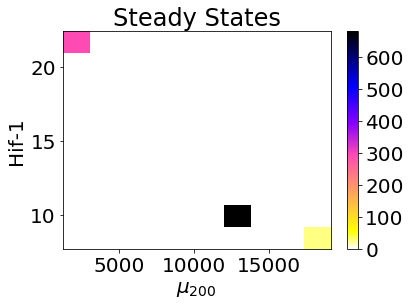

False B


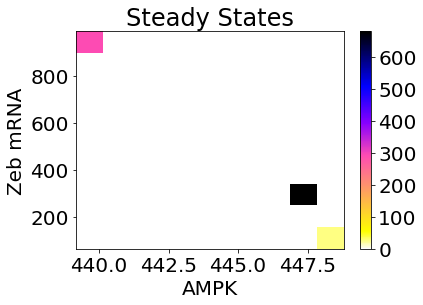

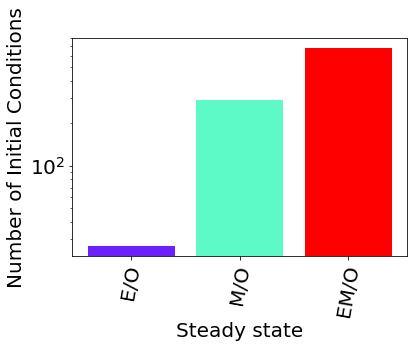

coupledWReg_Ccode/crosstalk_uh/EMT_MR_lamdauH22_1000_emt.png


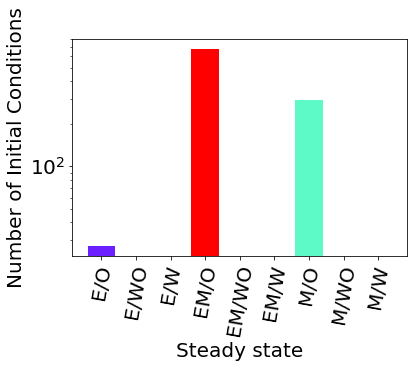

coupledWReg_Ccode/crosstalk_uh/EMT_MR_lamdauH22_1000_mr.png


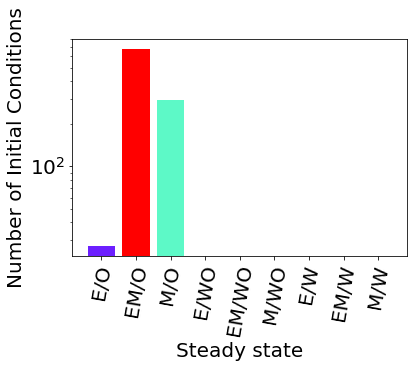

NameError: name 'CompRes' is not defined

In [15]:
for filen in os.listdir("coupledWReg_Ccode/crosstalk_uh/"):
    if "res" in filen and "txt" in filen:
        print filen
        filet = filen.replace('_res.txt','')
        plotRes("coupledWReg_Ccode/crosstalk_uh/"+filen,"coupledWReg_Ccode/crosstalk_uh/"+filet) 
        CompRes("coupledWReg_Ccode/crosstalk_uh/"+filen,comps[0])


In [ ]:
direct = "coupledWReg_Ccode/crosstalk_singles/"
regs={}
for filen in os.listdir(direct):
    if "res.txt" in filen:
        name= filen.split(".")[0].split("_")[2]
        lamda=''
        while name[-1].isdigit():
            lamda+=name[-1]
            name = name[:-1]
        
        if name not in regs.keys():
            regs[name]=[]
        regs[name]+=[lamda]
            
for k in regs:
    print k,np.sort(regs[k])

In [ ]:
def plotPerc(name,fcL):
    
    results={'E/O':[[],[]],'E/W':[[],[]],'E/WO':[[],[]],'EM/O':[[],[]],'EM/W':[[],[]],'EM/WO':[[],[]],'M/O':[[],[]],'M/W':[[],[]],'M/WO':[[],[]]}
    for i in range(len(fcL)):
        nics=1000.
        df = pd.read_csv("coupledWReg_Ccode/crosstalk_singles/EMT_MR_"+str(name)+str(regs[name][i])+"_"+str(int(nics))+"_res.txt").dropna()

        mapRes,mapResE,mapResM,maxC =getStates_fromMap(df,hold=True)
        for k in range(len(mapResE['name'])):
            tmp = mapResE['name'][k]
            results[tmp][0]+=[fcL[i]] 
            results[tmp][1]+=[mapResE['amount'][k]/nics*100.]
        
    print results['E/O'][0]
    
    fig, ((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3,3,figsize=(30,30))
    ax1.plot(results['E/O'][0],results['E/O'][1],'*',markersize=20)#,color=my_cmap(my_norm(mapResE['amount']/nics)))
    ax1.set_xlabel("Foldchange")#"Steady state")
    ax1.set_ylabel("Percentage IC ")
    ax2.plot(results['E/WO'][0],results['E/WO'][1],'*',markersize=20)#,color=my_cmap(my_norm(mapResE['amount']/nics)))
    ax2.set_xlabel("Foldchange")#"Steady state")
    #ax2.set_ylabel("Percentage IC ")
    ax3.plot(results['E/W'][0],results['E/W'][1],'*',markersize=20)#,color=my_cmap(my_norm(mapResE['amount']/nics)))
    ax3.set_xlabel("Foldchange")#"Steady state")
    #ax3.set_ylabel("Percentage IC ")
    ax4.plot(results['EM/O'][0],results['EM/O'][1],'*',markersize=20)#,color=my_cmap(my_norm(mapResE['amount']/nics)))
    ax4.set_xlabel("Foldchange")#"Steady state")
    #ax4.set_ylabel("Percentage IC ")
    ax5.plot(results['EM/WO'][0],results['EM/WO'][1],'*',markersize=20)#,color=my_cmap(my_norm(mapResE['amount']/nics)))
    ax5.set_xlabel("Foldchange")#"Steady state")
    #ax5.set_ylabel("Percentage IC ")
    ax6.plot(results['EM/W'][0],results['EM/W'][1],'*',markersize=20)#,color=my_cmap(my_norm(mapResE['amount']/nics)))
    ax6.set_xlabel("Foldchange")#"Steady state")
    ax6.set_ylabel("Percentage IC ")
    ax7.plot(results['M/O'][0],results['M/O'][1],'*',markersize=20)#,color=my_cmap(my_norm(mapResE['amount']/nics)))
    ax7.set_xlabel("Foldchange")#"Steady state")
    #ax7.set_ylabel("Percentage IC ")
    ax8.plot(results['M/WO'][0],results['M/WO'][1],'*',markersize=20)#,color=my_cmap(my_norm(mapResE['amount']/nics)))
    ax8.set_xlabel("Foldchange")#"Steady state")
    #ax8.set_ylabel("Percentage IC ")
    ax9.plot(results['M/W'][0],results['M/W'][1],'*',markersize=20)#,color=my_cmap(my_norm(mapResE['amount']/nics)))
    ax9.set_xlabel("Foldchange")#"Steady state")
    ax9.set_ylabel("Percentage IC ")
    plt.show()
    #plt.close()


In [ ]:
plotPerc('lamdaAZ',regs['lamdaAZ'])